# 使用局部线性嵌入对瑞士卷数据集降维

**案例描述**

人们常用三维瑞士卷数据集来测试算法降维后的效果。对瑞士卷数据集做降维，并可视化降维后的效果


In [1]:
#导入库
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 生成数据
from sklearn import datasets
swiss_roll_dataset =datasets.make_swiss_roll(n_samples=1000)
X = swiss_roll_dataset[0]
Y = np.floor(swiss_roll_dataset[1])
print(x.shape)

(1000, 3)


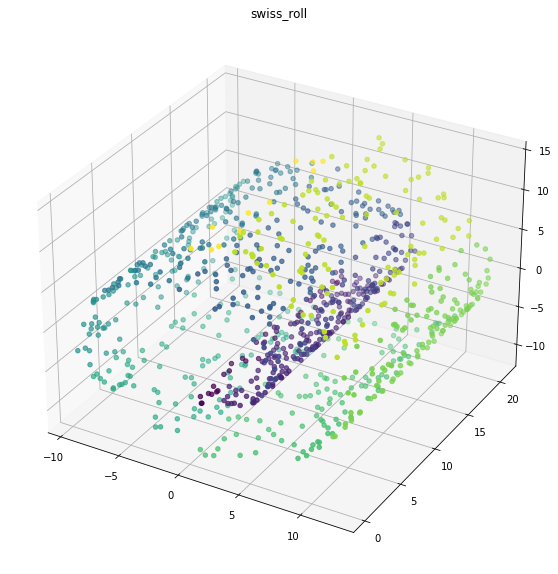

In [5]:
# 可视化数据
plt.figure(figsize=(10,10))
ax = plt.subplot( projection='3d')  # 创建一个三维的绘图工程
ax.set_title('swiss_roll')  # 设置本图名称
ax.scatter(x[:,0],x[:,1],x[:,2],c=y)
plt.show()

In [13]:
# 计算重建误差
from sklearn.manifold import LocallyLinearEmbedding as LLE
for i in [1,2,3]:
    lle=LLE(n_components=i)
    lle.fit(x)
    print("n=%d时，重建误差为%.5lf"%(i,lle.reconstruction_error_))

n=1时，重建误差为-0.00000
n=2时，重建误差为0.00000
n=3时，重建误差为0.00000


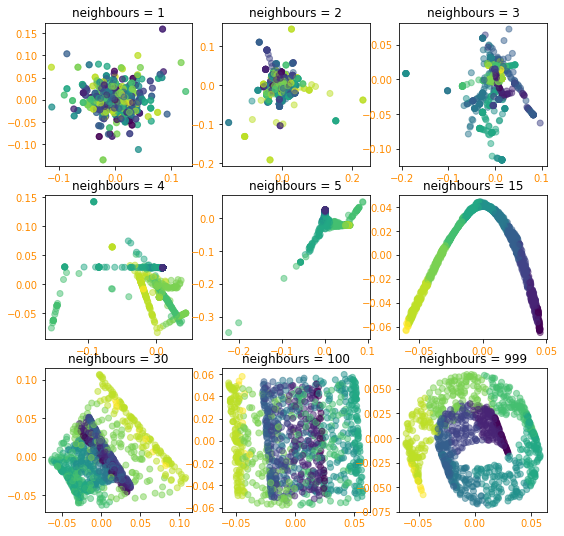

In [25]:
#根据不同的搜索样本临近数进行建模
fig=plt.figure("LLE", figsize = (9, 9))
Neighbors = [1, 2, 3, 4, 5, 15, 30, 100, y.size-1]
for i,n in enumerate(Neighbors):
    lle=LLE(n_components=2,n_neighbors=n,eigen_solver="dense")
    x_lle=lle.fit_transform(x)
    ax=fig.add_subplot(3,3,i+1)
    ax.scatter(x_lle[:,0],x_lle[:,1],marker='o',c=y,alpha=0.5) # 画散点图
    ax.set_title("neighbours = %d"%n) # 设置标题
    plt.xticks(fontsize=10, color="darkorange") # 设置y轴的字体大小及颜色
    plt.yticks(fontsize=10, color="darkorange") # 设置y轴的字体大小及颜色
    
plt.show()
#可以看出5<n<15的时候效果都很好

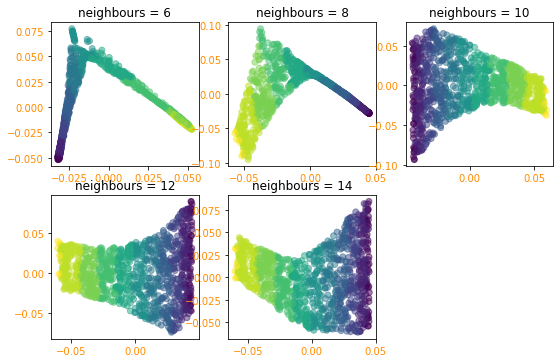

In [26]:
#搜索进一步优化
fig=plt.figure("LLE", figsize = (9, 9))
Neighbors = [6,8,10,12,14]
for i,n in enumerate(Neighbors):
    lle=LLE(n_components=2,n_neighbors=n,eigen_solver="dense")
    x_lle=lle.fit_transform(x)
    ax=fig.add_subplot(3,3,i+1)
    ax.scatter(x_lle[:,0],x_lle[:,1],marker='o',c=y,alpha=0.5) # 画散点图
    ax.set_title("neighbours = %d"%n) # 设置标题
    plt.xticks(fontsize=10, color="darkorange") # 设置y轴的字体大小及颜色
    plt.yticks(fontsize=10, color="darkorange") # 设置y轴的字体大小及颜色
    
plt.show()